# 4.10 Coding Etiquette & Excel Reporting

## This script contains the following points:

### 01. Importing Libraries
### 02. Importing Data
### 03. Checking the Dataframe
### 04. Personally Identifiable Information (PII)
### 05. Regional Segmentation
### VISUALIZING DIFFERENCES BETWEEN REGIONS
### 06.Global Styling for Visualizations
### 07. Stacked Bar Chart - 'region' x 'spending_flag'
### 08. Bar Chart - Total Items Ordered x 'region'
### 09. Bar Chart - Customers x 'region'
### 10. Boxplot - 'prices' x 'region'
### 11. Boxplot - Order Total x 'region'
### 12. Stacked Bar - 'department' x 'region'
### 13. Stacked Bar - 'loyalty_status' x 'region'
### 14. Stacked Bar Chart - 'price_label' x 'spending_flag'
### 15. Exclusion Flag
### 16. Creating an Income Flag Variable
### 17. Profiling
### VISUALIZING DIFFERENCES BETWEEN PROFILES
### 18. Bar Chart - Customers x 'customer_profile'
### 19. Clustered Bar Chart - Total Items Ordered x 'region' x 'customer_profile'
### 20. Stacked Bar Chart - 'region' x 'customer_profile'
### 21. Descriptive Statistics of the Profiles
### 22. Stacked Bar Chart - 'department' x 'customer_profile'
### 23. Clustered Bar Chart - Top 5 Departments x 'customer_profile'
### 24. Stacked Bar Chart - Top 5 Departments x 'customer_profile'
### 25. Boxplot - 'family_status' x 'customer_profile'
### 26. Bar Chart - Total Items Ordered x 'customer_profile'
### 27. Stacked Bar Chart - 'day' x 'customer_profile'
### 28. Stacked Bar Chart - 'order_hour_of_day' x 'customer_profile'
### 29. Stacked Bar Chart - 'loyalty_flag' x 'customer_profile'
### 30. Exporting Visualizations
### 31. Exporting Data

## 01. Importing Libraries

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

## 02. Importing Data

In [2]:
# Set project folder as a string
path = r'/Users/matthewjones/Documents/CareerFoundry/Data Immersion/Achievement 4/04-2024 Instacart Basket Analysis'

In [3]:
complete_instacart_data = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'complete_instacart_data.pkl'))

## 03. Checking the Dataframe

In [4]:
# Check imported dataframe's shape and output
complete_instacart_data.shape

(32404859, 33)

In [5]:
complete_instacart_data.head(5)

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,new_customer,product_id,add_to_cart_order,reordered,...,frequency_flag,department,day,gender,state,age,date_joined,number_of_dependents,family_status,income
0,2539329,1,1,2,8,NaN,True,196,1,0,...,Non-Frequent Customer,beverages,Monday,Female,Alabama,31,2/17/2019,3,married,40423
1,2539329,1,1,2,8,NaN,True,14084,2,0,...,Non-Frequent Customer,dairy eggs,Monday,Female,Alabama,31,2/17/2019,3,married,40423
2,2539329,1,1,2,8,NaN,True,12427,3,0,...,Non-Frequent Customer,snacks,Monday,Female,Alabama,31,2/17/2019,3,married,40423
3,2539329,1,1,2,8,NaN,True,26088,4,0,...,Non-Frequent Customer,snacks,Monday,Female,Alabama,31,2/17/2019,3,married,40423
4,2539329,1,1,2,8,NaN,True,26405,5,0,...,Non-Frequent Customer,household,Monday,Female,Alabama,31,2/17/2019,3,married,40423


In [6]:
# List out columns for ease of analysis
complete_instacart_data.columns

Index(['order_id', 'user_id', 'order_number', 'order_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'new_customer',
       'product_id', 'add_to_cart_order', 'reordered', 'product_name',
       'aisle_id', 'department_id', 'prices', 'price_label', 'busiest_day',
       'busiest_days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'average_price_across_orders', 'spending_flag',
       'median_days_since_prior_order', 'frequency_flag', 'department', 'day',
       'gender', 'state', 'age', 'date_joined', 'number_of_dependents',
       'family_status', 'income'],
      dtype='object')

## 04. Personally Identifiable Information (PII)

#### In a prior wrangling step, the columns first_name and last_name were dropped due to customer names being private information

## 05. Regional Segmentation

### Creating regional lists

In [7]:
# Create a list of states in the Northeast Region
northeast_region = ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut',
                    'New York', 'Pennsylvania', 'New Jersey']

In [8]:
# Create a list of states in the Midwest Region
midwest_region = ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota',
                  'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']

In [9]:
# Create a list of states in the South Region
south_region = ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina',
                'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 
                'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']

In [10]:
# Create a lsit of states in the West Region
west_region = ['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico',
               'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii']

### Creating a new 'region' column

In [11]:
# Apply the Northeast label to orders from the Northeast Region
complete_instacart_data.loc[complete_instacart_data['state'].isin(northeast_region), 'region'] = 'Northeast'

In [12]:
# Apply the Midwest label to orders from the Midwest Region
complete_instacart_data.loc[complete_instacart_data['state'].isin(midwest_region), 'region'] = 'Midwest'

In [13]:
# Apply the South label to orders from the South Region
complete_instacart_data.loc[complete_instacart_data['state'].isin(south_region), 'region'] = 'South'

In [14]:
# Apply the West label to orders from the West Region
complete_instacart_data.loc[complete_instacart_data['state'].isin(west_region), 'region'] = 'West'

In [15]:
# Check the number of products ordered per region
complete_instacart_data['region'].value_counts()

region
South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: count, dtype: int64

In [16]:
# Create a crosstab to compare spending categories across regions
spending_by_region = pd.crosstab(complete_instacart_data['region'],
                                 complete_instacart_data['spending_flag'], dropna = False)

In [17]:
# Check output
spending_by_region

spending_flag,High Spender,Low Spender
region,,
Midwest,29265,7568060
Northeast,18642,5704094
South,40579,10751306
West,31242,8261671


## VISUALIZING DIFFERENCES BETWEEN REGIONS

## 06. Global Styling for Visualizations

In [18]:
# Setting color palette for visualizations
colors = ['#aef6c7', '#5b8266', '#294936', '#212922']

In [19]:
# Create a function to manually order the 'loyalty_flag' column
loyalty_order = ['New Customer', 'Regular Customer', 'Loyal Customer']
loyalty_order_func = {key: i for i, key in enumerate(loyalty_order)}

In [20]:
# Create a function to manually order the 'day' column
dow_order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
dow_order_func = {key: i for i, key in enumerate(dow_order)}

In [21]:
# Create a function to manually order the 'region' column
region_order = ['West', 'Midwest', 'South', 'Northeast']
region_order_func = {key: i for i, key in enumerate(region_order)}

In [22]:
# Create a function to manually order the 'price_label' column
pricelabel_order = ['Low-Range Product', 'Mid-Range Product', 'High-Range Product']
pricelabel_order_func = {key: i for i, key in enumerate(pricelabel_order)}

## 07. Stacked Bar Chart - 'region' x 'spending_flag'

### Group data with a crosstab comparing region and customer spending category

In [23]:
# Create a crosstab to use for stacked bar graph measuring the customer spending categories of each region
spending_by_region_stacked = pd.crosstab(complete_instacart_data['region'],
                                       complete_instacart_data['spending_flag'], dropna = False,
                                       normalize = 'index')

# Sort the 'region' column using the order function
spending_by_region_stacked = spending_by_region_stacked.sort_values(by=['region'], 
                                              key=lambda x: x.map(region_order_func))

In [24]:
# Check the output
spending_by_region_stacked

spending_flag,High Spender,Low Spender
region,,
West,0.003767,0.996233
Midwest,0.003852,0.996148
South,0.003760,0.996240
Northeast,0.003258,0.996742


### Plot the Stacked Bar Chart

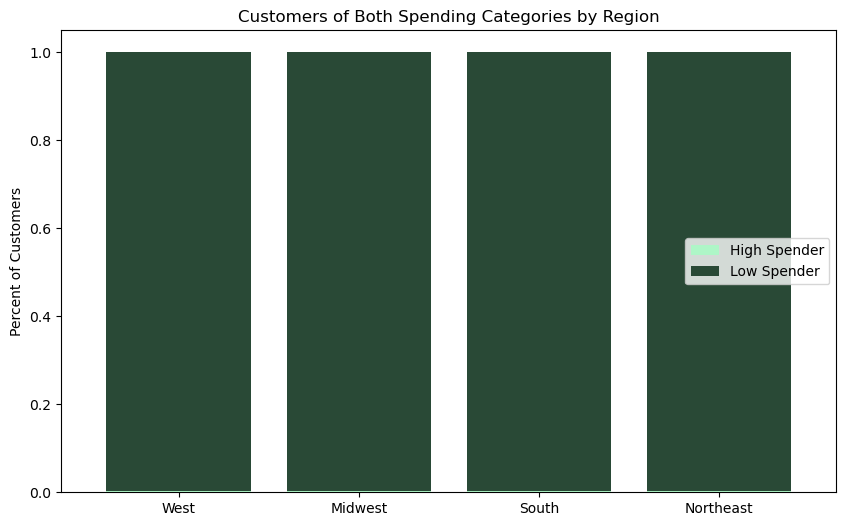

In [25]:
# Plotting a stacked bar chart
region_spenders_stacked_bar = spending_by_region_stacked.plot(kind='bar', stacked=True,
                                                         color = ['#aef6c7', '#294936', '#5b8266', '#212922'],
                                                         figsize=(10, 6), width = 0.8)

# Formatting the titles, axes, and legend
plt.title('Customers of Both Spending Categories by Region')
plt.xlabel('')
plt.ylabel('Percent of Customers')
plt.xticks(rotation = 0)
plt.legend(loc = 7)

### CONCLUSION
### Most customers are Low Spenders. And there is no difference in the proportion of High and Low Spenders across regions

## 08. Bar Chart - Total Items Ordered x 'region'

### Reduce necessary data to run // Group data to find total items ordered by region

In [26]:
# Subset the dataframe to only include the 'region' and 'order_id' columns
region_bar_data = complete_instacart_data[['region', 'order_id']]

# Aggregate the dataframe by counting the number of rows per region
region_bar_data = region_bar_data.groupby('region').count()

# Sort the 'region' column using the order function
region_bar_data = region_bar_data.sort_values(by=['region'], 
                                              key=lambda x: x.map(region_order_func))

# Reset the index after aggregating the data
region_bar_data = region_bar_data.reset_index()

In [27]:
# Check the output
region_bar_data

,region,order_id
0,West,8292913
1,Midwest,7597325
2,South,10791885
3,Northeast,5722736


### Plot the Bar Chart

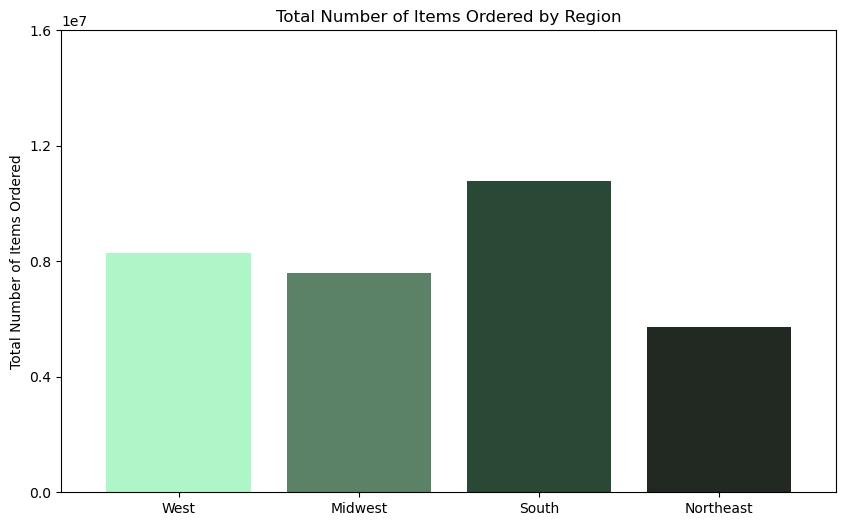

In [28]:
# Plotting the bar chart
region_bar = region_bar_data.plot.bar(x = 'region', y = 'order_id', color = colors, figsize=(10, 6), width = 0.8)

# Formatting the titles and axes
plt.title('Total Number of Items Ordered by Region')
plt.xlabel('')
plt.ylabel('Total Number of Items Ordered')
plt.xticks(rotation = 0)
plt.yticks(np.arange(0, 17000000, step=4000000))
plt.legend('', frameon = False)

### CONCLUSION
### There are more orders placed in the South than in any other region. And fewest orders in the Northeast.

## 09. Bar Chart - Customers x 'region'

### Reduce necessary data to run // Group data to find total customers by region

In [29]:
# Subset the dataframe to only include the 'region' and 'order_id' columns
unique_region_bar_data = complete_instacart_data[['region', 'order_id']]

# Aggregate the dataframe by counting the number of rows per region
unique_region_bar_data = unique_region_bar_data.groupby('region').nunique()

# Sort the 'region' column using the order function
unique_region_bar_data = unique_region_bar_data.sort_values(by=['region'], 
                                                            key=lambda x: x.map(region_order_func))

In [30]:
# Check the output
unique_region_bar_data

,order_id
region,
West,821686
Midwest,754275
South,1071562
Northeast,567162


### Plot the Bar Chart

([<matplotlib.axis.YTick at 0x165bba910>,
 [Text(0, 0, '0.0'),
  Text(0, 400000, '0.4'),
  Text(0, 800000, '0.8'),
  Text(0, 1200000, '1.2'),
  Text(0, 1600000, '1.6')])

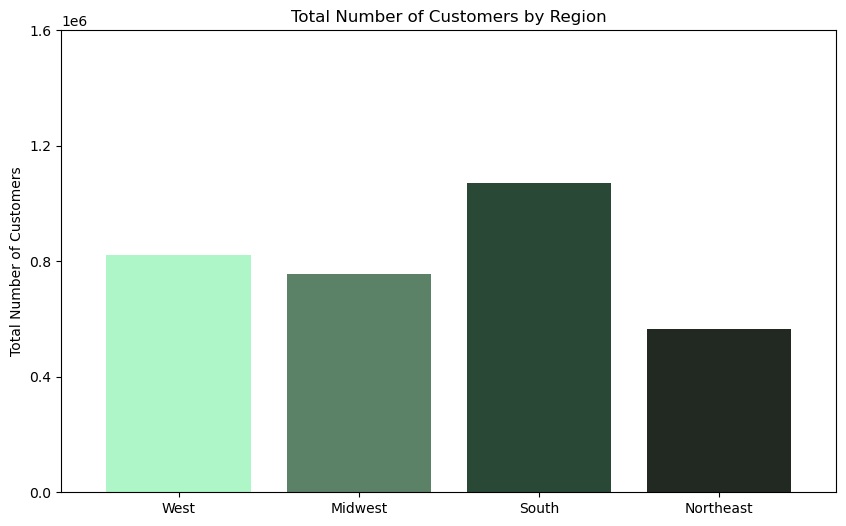

In [31]:
# Plotting the bar chart
unique_region_bar = unique_region_bar_data['order_id'].plot.bar(color = colors, figsize=(10, 6), width = 0.8)
# FOR FUTURE: add data labels to bar chart

# Formatting the titles and axes
plt.title('Total Number of Customers by Region')
plt.xlabel('')
plt.ylabel('Total Number of Customers')
plt.xticks(rotation = 0)
plt.yticks(np.arange(0, 1700000, step=400000))

### CONCLUSION
### Unsurprisingly, this chart looks identical to the Total Orders by Region bar chart. The South has the most customers, and the Northeast has the fewest.

## 10. Boxplot - 'prices' x 'region'

### Reduce necessary data to run

In [32]:
# Select only the 'region' and 'prices' columns to analyze
region_price_box_data = complete_instacart_data[['region', 'prices']]


# Sort the 'region' column using the order function
region_price_box_data = region_price_box_data.sort_values(by=['region'], 
                                                          key=lambda x: x.map(region_order_func))

In [33]:
# Check the output
region_price_box_data.head(5)

,region,prices
11518252,West,12.3
15700105,West,13.4
15700106,West,3.7
15700107,West,6.5
15700108,West,10.0


### Plot the Boxplot

(array([0, 1, 2, 3]),
 [Text(0, 0, 'West'),
  Text(1, 0, 'Midwest'),
  Text(2, 0, 'South'),
  Text(3, 0, 'Northeast')])

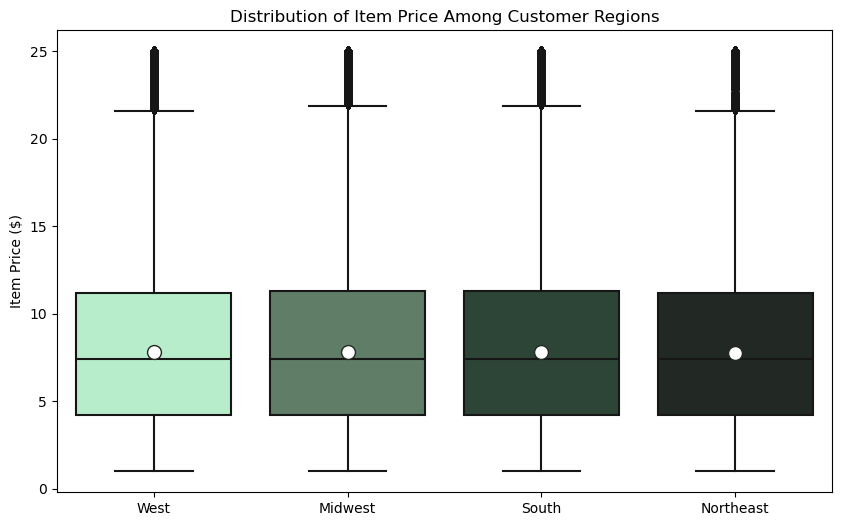

In [34]:
# Plotting the boxplot
region_price_boxplot = plt.figure(figsize = (10,6))
sns.boxplot(x = 'region', y = 'prices', data = region_price_box_data, 
            palette = colors, showmeans=True, showfliers = True,
            meanprops={'marker' : 'o',
                       'markerfacecolor' : 'white',
                       'markeredgecolor' : '#212922',
                       'markersize' : '10'})

# FOR FUTURE: add data points on top of boxes/whiskers


# Formatting the titles and axes
plt.title('Distribution of Item Price Among Customer Regions')
plt.xlabel('')
plt.ylabel('Item Price ($)')
plt.xticks(rotation = 0)

### CONCLUSION
### There is no difference between the regions on the average amount spent per item.

## 11. Boxplot - Order Total x 'region'

### Reduce necessary data to run // Group data to find order totals by region

In [35]:
# Select only the 'order_id', 'prices', and 'region' columns to analyze
order_total_region_box_data = complete_instacart_data[['order_id', 'prices', 'region']]

In [36]:
# Aggregate the dataframe by totaling the values in the 'prices' column for each 'order_id' and 'region'
order_total_region_box_data = order_total_region_box_data.groupby(['order_id', 'region']).sum()

# Sort the 'region' column using the order function
order_total_region_box_data = order_total_region_box_data.sort_values(by=['region'], 
                                                                      key=lambda x: x.map(region_order_func))

In [37]:
# Check the output
order_total_region_box_data.head(5)

,,prices
order_id,region,
2,West,91.6
1606092,West,18.9
1606088,West,50.3
1606079,West,106.5
1606076,West,93.6


### Plot the Boxplot

(array([0, 1, 2, 3]),
 [Text(0, 0, 'West'),
  Text(1, 0, 'Midwest'),
  Text(2, 0, 'South'),
  Text(3, 0, 'Northeast')])

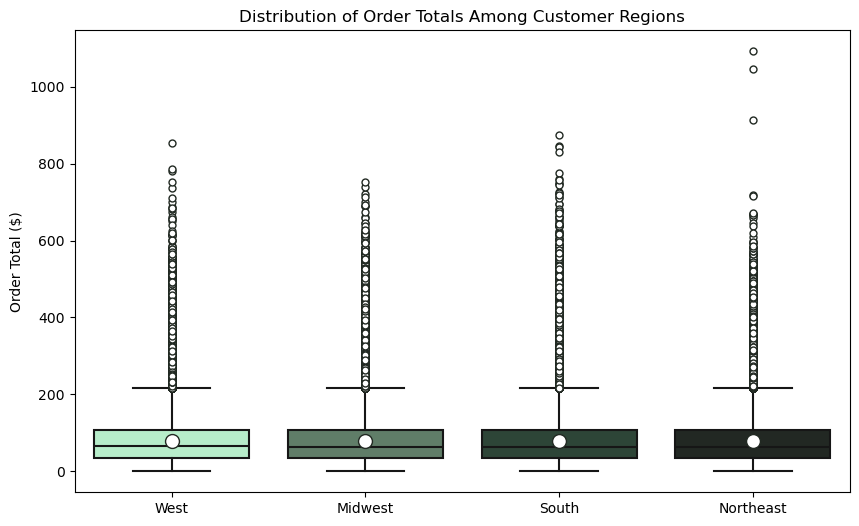

In [38]:
# Plotting the boxplot
order_total_region_boxplot = plt.figure(figsize = (10,6))
sns.boxplot(x = 'region', y = 'prices', data = order_total_region_box_data.reset_index(), 
            palette = colors, showmeans=True, showfliers = True,
            meanprops={'marker' : 'o',
                       'markerfacecolor' : 'white',
                       'markeredgecolor' : '#212922',
                       'markersize' : '10'},
            flierprops={'marker': 'o', 'markersize': 5, 'markeredgecolor': '#212922', 'markerfacecolor' : 'white'})

# FOR FUTURE: add data points on top of boxes/whiskers


# Formatting the titles and axes
plt.title('Distribution of Order Totals Among Customer Regions')
plt.xlabel('')
plt.ylabel('Order Total ($)')
plt.xticks(rotation = 0)

### CONCLUSION
### There is no difference between the regions on the total amount spent per order. However, the Northeast does have the highest outliers.

## 12. Stacked Bar - 'department' x 'region'

### Group data with a crosstab comparing department and region

In [39]:
# Create a crosstab to use for clustered bar graph measuring the department totals of each region
region_department = pd.crosstab(complete_instacart_data['department'],
                                 complete_instacart_data['region'], dropna = False, 
                                 normalize='index') # Use normalize for stacked bar charts

# Sort the 'region' column headings using the order function
region_department = region_department.sort_values(by=['region'], axis = 1, key=lambda x: x.map(region_order_func))

In [40]:
# Check the output
region_department

region,West,Midwest,South,Northeast
department,,,,
alcohol,0.255986,0.235439,0.335884,0.172692
babies,0.250178,0.233560,0.338965,0.177297
bakery,0.256856,0.233591,0.331632,0.177921
beverages,0.253036,0.232718,0.334412,0.179835
breakfast,0.258390,0.232636,0.333201,0.175773
bulk,0.261620,0.236977,0.333584,0.167819
canned goods,0.257089,0.234727,0.333329,0.174855
dairy eggs,0.256269,0.234170,0.332849,0.176712
deli,0.256205,0.233701,0.332385,0.177710


### Plot the Stacked Bar Chart

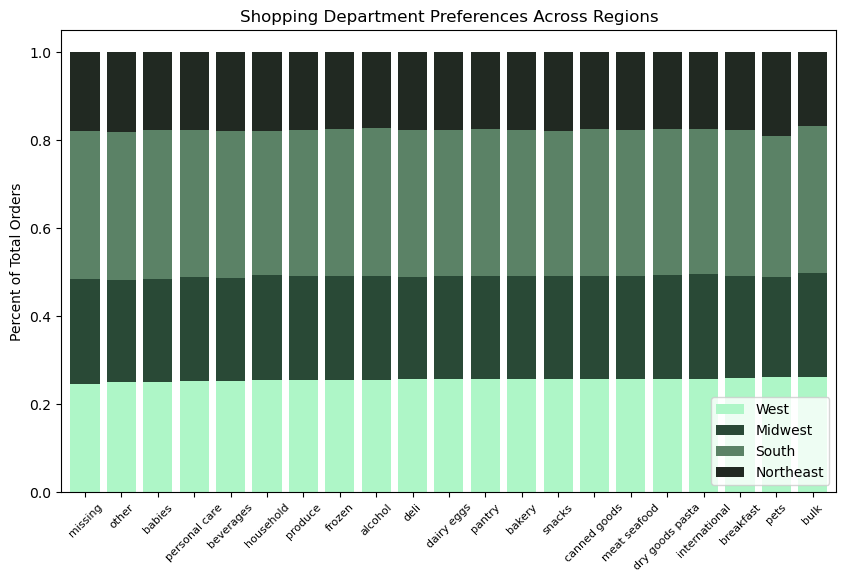

In [41]:
# Plotting a stacked bar chart
region_department_stacked_bar = region_department.sort_values('West').plot(kind='bar', stacked=True,
                                                         color = ['#aef6c7', '#294936', '#5b8266', '#212922'],
                                                         figsize=(10, 6), width = 0.8)

# Formatting the titles, axes, and legend
plt.title('Shopping Department Preferences Across Regions')
plt.xlabel('')
plt.ylabel('Percent of Total Orders')
plt.xticks(rotation = 45)
plt.xticks(fontsize=8)
plt.legend(loc = 4)

### CONCLUSION
### For each product category, the proportion of purchases made by each region is the same.

## 13. Stacked Bar - 'loyalty_status' x 'region'

### Group data with a crosstab comparing customer loyalty status and region

In [42]:
# Create a crosstab to use for clustered bar graph measuring the loyalty status of each region
region_loyalty = pd.crosstab(complete_instacart_data['region'],
                             complete_instacart_data['loyalty_flag'], dropna = False, 
                             normalize='index') # Use normalize for stacked bar charts

# Sort the 'region' column using the order function
region_loyalty = region_loyalty.sort_values(by=['region'], key=lambda x: x.map(region_order_func))

# Sort the 'loyalty_flag' column headings using the order function
region_loyalty = region_loyalty.sort_values(by=['loyalty_flag'], axis = 1, key=lambda x: x.map(loyalty_order_func))

In [43]:
# Check the output
region_loyalty

loyalty_flag,New Customer,Regular Customer,Loyal Customer
region,,,
West,0.192550,0.486370,0.321080
Midwest,0.193828,0.493724,0.312449
South,0.192219,0.492188,0.315593
Northeast,0.192252,0.485912,0.321836


### Plot the Stacked Bar Chart

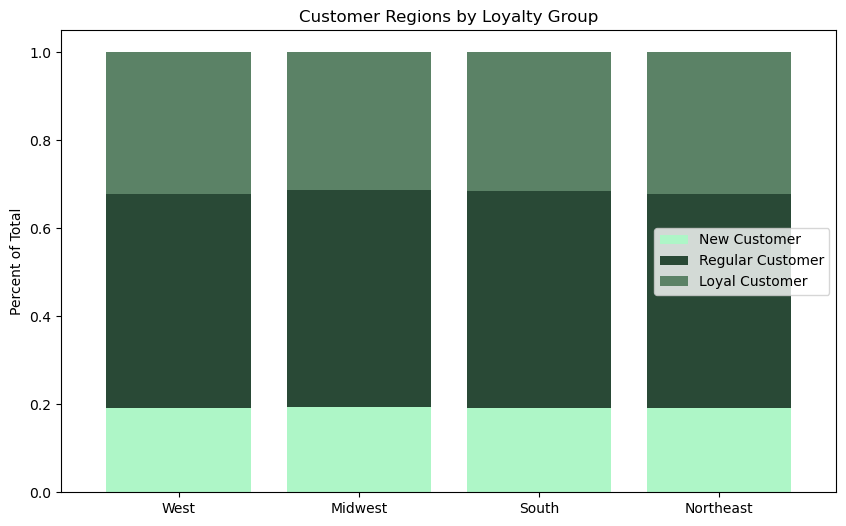

In [44]:
# Plotting the stacked bar chart
region_loyalty_stacked_bar = region_loyalty.plot(kind='bar', stacked=True, 
                                                 color = ['#aef6c7', '#294936', '#5b8266', '#212922'],
                                                 figsize=(10, 6), width = 0.8)

# Formatting the titles, axes, and legend
plt.title('Customer Regions by Loyalty Group')
plt.xlabel('')
plt.ylabel('Percent of Total')
plt.xticks(rotation = 0)
plt.legend(title = '', loc = 7)

### CONCLUSION
### For each region, the proportion of customers in each loyalty group is the same.

## 14. Stacked Bar Chart - 'price_label' x 'spending_flag'

### Group data with a crosstab comparing pricing labels with customer spending category

In [45]:
# Create a crosstab to use for clustered bar graph measuring the department totals of each region
spending_pricelabel = pd.crosstab(complete_instacart_data['spending_flag'],
                      complete_instacart_data['price_label'], dropna = True, 
                      normalize='index') # Use normalize for stacked bar charts

# Sort the 'price_label' column using the order function
spending_pricelabel = spending_pricelabel.sort_values(by=['price_label'], axis=1, key=lambda x: x.map(pricelabel_order_func))

In [46]:
# Check the output
spending_pricelabel

price_label,Low-Range Product,Mid-Range Product,High-Range Product
spending_flag,,,
High Spender,0.139811,0.791211,0.068978
Low Spender,0.313184,0.674291,0.012525


### Plot the stacked bar chart

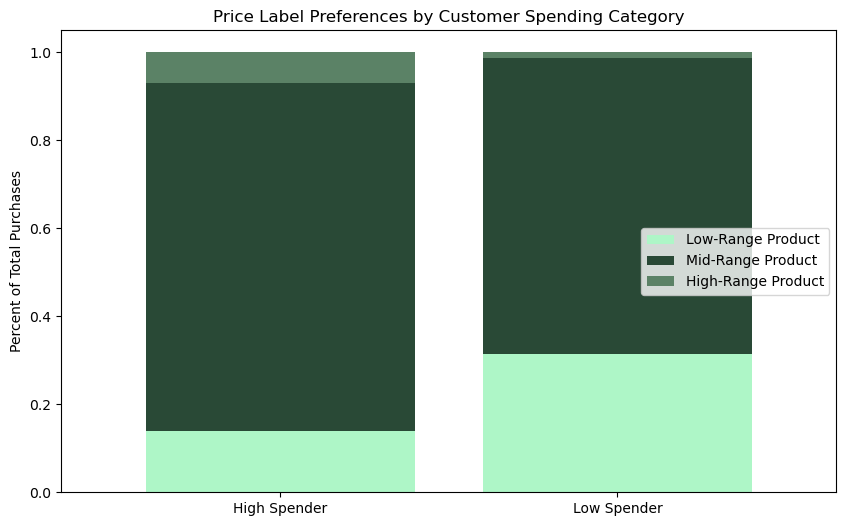

In [47]:
# Plotting the stacked bar chart
spending_pricelabel_stacked_bar = spending_pricelabel.plot(kind='bar', stacked=True, 
                                                           color = ['#aef6c7', '#294936', '#5b8266', '#212922'],
                                                           figsize=(10, 6), width = 0.8)

# Formatting the titles, axes, and legend
plt.title('Price Label Preferences by Customer Spending Category')
plt.xlabel('')
plt.ylabel('Percent of Total Purchases')
plt.xticks(rotation = 0)
plt.legend(title = '', loc = 7)

### CONCLUSION
### Customers who are High Spenders purchase a higher proportion of High-Range and Mid-Range Products than Low Spenders. And Low Spenders purchase a higher proportion of Low-Range Products.

## 15. Exclusion Flag

In [48]:
# Flag rows with customers who made fewer than 5 orders to be excluded in a new column
complete_instacart_data.loc[complete_instacart_data['max_order'] < 5, 'exclusion_flag'] = 'Exclude'

In [49]:
# Flag rows with customers who made 5 or more orders to be kept in a new column
complete_instacart_data.loc[complete_instacart_data['max_order'] >= 5, 'exclusion_flag'] = 'Keep'

In [50]:
# Count the number of rows to be excluded
complete_instacart_data['exclusion_flag'].value_counts(dropna = False)

exclusion_flag
Keep       30964564
Exclude     1440295
Name: count, dtype: int64

In [51]:
# Subset the dataframe to exclude the rows labeled as 'Exclude'
complete_instacart_data_active = complete_instacart_data[complete_instacart_data['exclusion_flag'] == 'Keep']

In [52]:
# Check the new dataframe's shape
complete_instacart_data_active.shape

(30964564, 35)

## 16. Creating an Income Flag Variable

In [53]:
# Flag rows with customers with an income of over $97,000
# $97,000 was used as the cutoff point because it resulted in a roughly even split between Low- and High-Income
complete_instacart_data_active.loc[complete_instacart_data_active['income'] > 97000, 
                                   'income_flag'] = 'High-Income'

/var/folders/40/hn3x1h6s6vgb3bv80rtm46q80000gn/T/ipykernel_50186/3628585142.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  complete_instacart_data_active.loc[complete_instacart_data_active['income'] > 97000,


In [54]:
# Flag rows with customers with an income of under $100,000
complete_instacart_data_active.loc[complete_instacart_data_active['income'] <= 97000, 'income_flag'] = 'Low-Income'

In [55]:
# Check the values of the income_flag
complete_instacart_data_active['income_flag'].value_counts(dropna = False)

income_flag
Low-Income     15575544
High-Income    15389020
Name: count, dtype: int64

## 17. Profiling

### PROFILE #1: Low-Income, Young Adult

##### Characteristics: Income <= $97,000 and single or living with parents/siblings

In [132]:
# Flag rows with customers that fit the Single Adult profile in a new column, 'customer_profile'
complete_instacart_data_active.loc[(complete_instacart_data_active['family_status'].isin(['living with parents and siblings', 
                                                                                          'single'])) &
                                   (complete_instacart_data_active['income_flag'] == 'Low-Income'), 
                                   'customer_profile'] = 'Low-Income, Young Adult'
                                    
                                    

In [133]:
# Subset the dataframe to include on the rows labeled 'Single Adult'
df_low_young = complete_instacart_data_active.loc[(complete_instacart_data_active['customer_profile'] == 'Low-Income, Young Adult')]

In [134]:
# Check the shape of the new dataframe
df_low_young.shape

(4544888, 37)

### PROFILE #2: High-Income, Young Adult

##### Characteristics: Income > $97,000 and single or living with parents/siblings

In [59]:
# Flag rows with customers that fit the Single Adult profile in a new column, 'customer_profile'
complete_instacart_data_active.loc[(complete_instacart_data_active['family_status'].isin(['living with parents and siblings', 
                                                                                          'single'])) &
                                   (complete_instacart_data_active['income'] > 97000), 
                                   'customer_profile'] = 'High-Income, Young Adult'

## Using family status as an estimate for age is not exact. There are young married customers, 
## and older single customers.

In [60]:
# Subset the dataframe to include on the rows labeled 'Single Adult'
df_high_young = complete_instacart_data_active.loc[(complete_instacart_data_active['customer_profile'] == 'High-Income, Young Adult')]

In [61]:
# Check the shape of the new dataframe
df_high_young.shape

(2030694, 37)

### PROFILE #3: Low-Income, Older Adult

##### Characteristics: Income <= $97,000 and married or divorced/widowed

In [62]:
# Flag rows with customers that fit the Single Adult profile in a new column, 'customer_profile'
complete_instacart_data_active.loc[(complete_instacart_data_active['family_status'].isin(['married', 
                                                                                          'divorced/widowed'])) &
                                   (complete_instacart_data_active['income'] <= 97000), 
                                   'customer_profile'] = 'Low-Income, Older Adult'

In [63]:
# Subset the dataframe to include on the rows labeled 'Single Adult'
df_low_older = complete_instacart_data_active.loc[(complete_instacart_data_active['customer_profile'] == 'Low-Income, Older Adult')]

In [64]:
df_low_older.shape

(11030656, 37)

### PROFILE #4: High-Income, Older Adult

##### Characteristics: Income > $97,000 and married or divorced/widowed

In [65]:
# Flag rows with customers that fit the Single Adult profile in a new column, 'customer_profile'
complete_instacart_data_active.loc[(complete_instacart_data_active['family_status'].isin(['married', 
                                                                                          'divorced/widowed'])) &
                                   (complete_instacart_data_active['income'] > 97000), 
                                   'customer_profile'] = 'High-Income, Older Adult'

In [66]:
# Subset the dataframe to include on the rows labeled 'Single Adult'
df_high_older = complete_instacart_data_active.loc[(complete_instacart_data_active['customer_profile'] == 'High-Income, Older Adult')]

In [67]:
df_high_older.shape

(13358326, 37)

In [68]:
# Create a function to manually order the 'customer_profile' column
profile_order = ['Low-Income, Young Adult', 'High-Income, Young Adult', 
                 'Low-Income, Older Adult', 'High-Income, Older Adult']
profile_order_func = {key: i for i, key in enumerate(profile_order)}

In [150]:
complete_instacart_data_active['customer_profile'].value_counts()

customer_profile
High-Income, Older Adult    13358326
Low-Income, Older Adult     11030656
Low-Income, Young Adult      4544888
High-Income, Young Adult     2030694
Name: count, dtype: int64

## VISUALIZING DIFFERENCES BETWEEN PROFILES

## 18. Bar Chart - Customers x 'customer_profile'

In [69]:
# Aggregate data to count number of unique users in each customer profile
profile_numbers_data = complete_instacart_data_active.groupby('customer_profile').agg(total_users = 
                                                                                      ('user_id', 'nunique'))

# Sort the 'customer_profile' column using the order function
profile_numbers_data = profile_numbers_data.sort_values(by=['customer_profile'], key=lambda x: x.map(profile_order_func))

In [70]:
# Check the output
profile_numbers_data

,total_users
customer_profile,
"Low-Income, Young Adult",24509
"High-Income, Young Adult",9995
"Low-Income, Older Adult",62079
"High-Income, Older Adult",66048


### Plot the Bar Chart

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Low-Income, Young Adult'),
  Text(1, 0, 'High-Income, Young Adult'),
  Text(2, 0, 'Low-Income, Older Adult'),
  Text(3, 0, 'High-Income, Older Adult')])

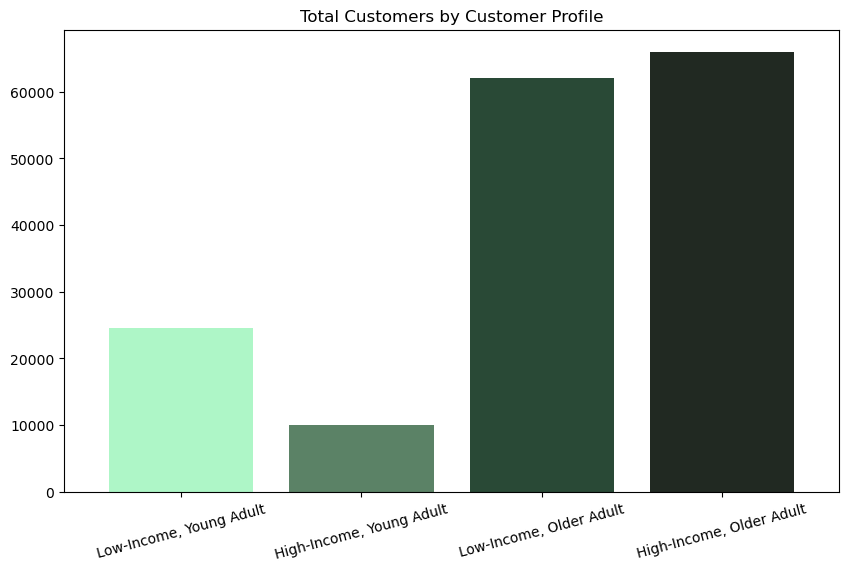

In [71]:
# Plot a bar chart counting the number of users for each customer profile
profile_bar = plt.figure(figsize = (10,6))
profile_numbers_data['total_users'].plot.bar(color = colors, figsize=(10, 6), width = 0.8)

# Formatting the titles and axes
plt.title('Total Customers by Customer Profile')
plt.xlabel('')
plt.ylabel('')
plt.xticks(rotation = 15)

### CONCLUSION
### There are many more older adult customers in our data set. And of the older adults, slightly more of them are High-Income. Of the young adults, more of them are Low-Income. This goes along with the previously observed trend.

## 19. Clustered Bar Chart  - Total Items Ordered x 'region' x 'customer_profile'

### Group data with a crosstab comparing region and customer profile

In [72]:
# Create a crosstab to use for clustered bar graph measuring the numbers of customer profiles per region
region_profile_data = pd.crosstab(complete_instacart_data_active['region'],
                            complete_instacart_data_active['customer_profile'], dropna = False)

# Sort the 'region' column using the order function
region_profile_data = region_profile_data.sort_values(by=['region'], key=lambda x: x.map(region_order_func))

# Sort the 'customer_profile' column headings using the order function
region_profile_data = region_profile_data.sort_values(by=['customer_profile'], axis = 1,
                                                      key=lambda x: x.map(profile_order_func))

In [73]:
# Check the output
region_profile_data

customer_profile,"Low-Income, Young Adult","High-Income, Young Adult","Low-Income, Older Adult","High-Income, Older Adult"
region,,,,
West,1146988,529320,2833405,3417514
Midwest,1057474,499579,2534194,3170266
South,1531253,678823,3732632,4368431
Northeast,809173,322972,1930425,2402115


In [74]:
# Create long table to be compatible with a clustered bar graph
region_profile_data_long = region_profile_data.reset_index().melt(id_vars='region', var_name='customer_profile', value_name= 'count')

In [75]:
# Check the output
region_profile_data_long

,region,customer_profile,count
0,West,"Low-Income, Young Adult",1146988
1,Midwest,"Low-Income, Young Adult",1057474
2,South,"Low-Income, Young Adult",1531253
3,Northeast,"Low-Income, Young Adult",809173
4,West,"High-Income, Young Adult",529320
5,Midwest,"High-Income, Young Adult",499579
6,South,"High-Income, Young Adult",678823
7,Northeast,"High-Income, Young Adult",322972
8,West,"Low-Income, Older Adult",2833405
9,Midwest,"Low-Income, Older Adult",2534194


### Plot the Clustered Bar Chart

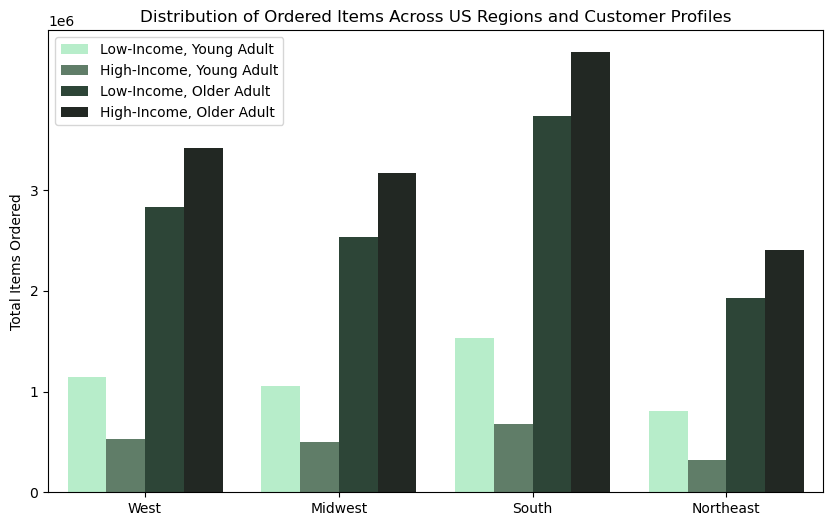

In [76]:
# Plot a clustered bar chart comparing the four customer profiles in each region
region_profile_cluster = plt.figure(figsize = (10,6))
sns.barplot(x = 'region', y = 'count', hue = 'customer_profile', data = region_profile_data_long, palette = colors)

# Formatting the titles and axes
plt.title('Distribution of Ordered Items Across US Regions and Customer Profiles')
plt.xlabel('')
plt.ylabel('Total Items Ordered')
plt.xticks(rotation = 0)
plt.yticks(np.arange(0, 3500000, step = 1000000))
plt.legend(loc = 2)

### CONCLUSIONS
### Each region/profile cluster looks similar to the overall shape of the bar chart when it was just divided by customer profile. It does not appear that any region has an effect on the performance of the customer profile (other than the size of the region's population).

## 20. Stacked Bar Chart - 'region' x 'customer_profile'

### Group data with a crosstab comparing region and customer profile

In [77]:
# Create a crosstab to use for clustered bar graph measuring the numbers of customer profiles per region
region_profile_stacked = pd.crosstab(complete_instacart_data_active['region'],
                                     complete_instacart_data_active['customer_profile'], dropna = False,
                                     normalize = 'index')

# Sort the 'region' column using the order function 
region_profile_stacked = region_profile_stacked.sort_values(by=['region'], key=lambda x: x.map(region_order_func))

# Sort the 'customer_profile' column headings using the order function
region_profile_stacked = region_profile_stacked.sort_values(by=['customer_profile'], axis = 1,
                                                      key=lambda x: x.map(profile_order_func))

In [78]:
# Check the output
region_profile_stacked

customer_profile,"Low-Income, Young Adult","High-Income, Young Adult","Low-Income, Older Adult","High-Income, Older Adult"
region,,,,
West,0.144690,0.066772,0.357427,0.431111
Midwest,0.145627,0.068798,0.348990,0.436585
South,0.148505,0.065834,0.362000,0.423661
Northeast,0.148073,0.059102,0.353255,0.439571


### Plot the Stacked Bar Chart

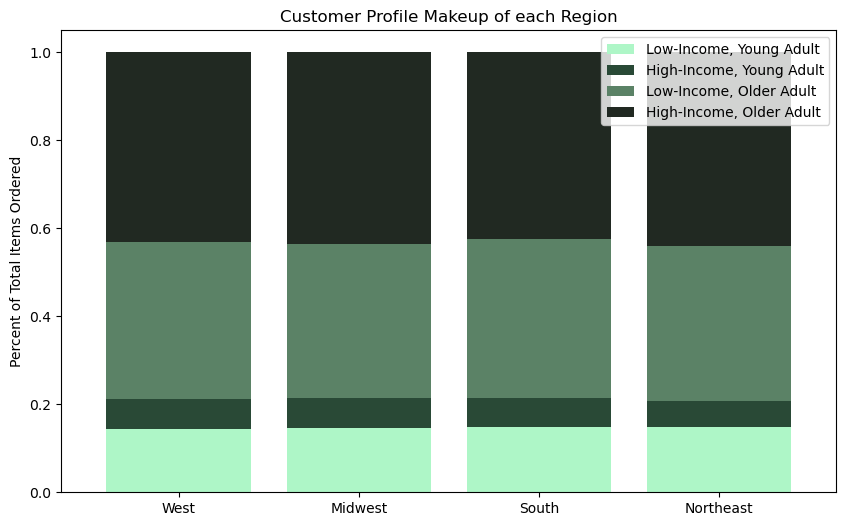

In [79]:
# Plotting the stacked bar chart
region_profile_stacked_bar = region_profile_stacked.plot(kind='bar', stacked=True, 
                                                         color = ['#aef6c7', '#294936', '#5b8266', '#212922'],
                                                         figsize=(10, 6), width = 0.8)

# Formatting the titles, axes, and legend
plt.title('Customer Profile Makeup of each Region')
plt.xlabel('')
plt.ylabel('Percent of Total Items Ordered')
plt.xticks(rotation = 0)
plt.legend(title = '', loc = 1)

### CONCLUSION
### While the previous visualization showed that the absolute number of ordered items varied across customer profiles and regions. This chart shows that across all regions, the proportion of each customer profile is the same.

## 21. Descriptive Statistics of the Profiles

In [80]:
# Calculate descriptive statistics to compare the customer profiles
complete_instacart_data_active.groupby('customer_profile').agg({'order_id' : ['count'], 
                                                                'average_price_across_orders' : ['mean', 'min', 'max'],
                                                                'median_days_since_prior_order' : ['mean'],
                                                                'max_order' : ['mean', 'min', 'max'],
                                                                'number_of_dependents' : ['mean', 'min', 'max']}).sort_values(by=['customer_profile'], key=lambda x: x.map(profile_order_func))


order_id average_price_across_orders            \
                             count                        mean       min   
customer_profile                                                           
Low-Income, Young Adult    4544888                    7.714739  1.000000   
High-Income, Young Adult   2030694                    7.950130  4.656522   
Low-Income, Older Adult   11030656                    7.592071  1.000000   
High-Income, Older Adult  13358326                    7.956076  4.370588   

                                    median_days_since_prior_order  max_order  \
                                max                          mean       mean   
customer_profile                                                               
Low-Income, Young Adult   14.900000                      9.973030  34.599498   
High-Income, Young Adult  16.294737                      9.887180  34.930586   
Low-Income, Older Adult   18.233333                     10.039939  34.222460   
High-Income, Older Adult  20.114286                      9.893997  34.457615   

                                 number_of_dependents          
                         min max                 mean min max  
customer_profile                                               
Low-Income, Young Adult    5  99             0.601150   0   3  
High-Income, Young Adult   5  99             0.103713   0   3  
Low-Income, Older Adult    5  99             1.874733   0   3  
High-Income, Older Adult   5  99             1.712855   0   3

### Average price across orders shows a slight pattern supporting the argument that High-Income customers spend more on orders. And Low-Income customers have a higher average number of dependents than the High-Income customers in the same age range. Low-Income customers also take a little longer between orders.

### Calculating the top product departments for each customer profile

In [81]:
# Calculate descriptive statistics for numeric variables of the Single Adult profile
df_low_young.groupby('department').count().sort_values(by = 'order_id', ascending = False).head(5)

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,new_customer,product_id,add_to_cart_order,reordered,...,state,age,date_joined,number_of_dependents,family_status,income,region,exclusion_flag,income_flag,customer_profile
department,,,,,,,,,,,,,,,,,,,,,
produce,1324534,1324534,1324534,1324534,1324534,1255879,1324534,1324534,1324534,1324534,...,1324534,1324534,1324534,1324534,1324534,1324534,1324534,1324534,1324534,1324534
dairy eggs,756879,756879,756879,756879,756879,717872,756879,756879,756879,756879,...,756879,756879,756879,756879,756879,756879,756879,756879,756879,756879
snacks,429173,429173,429173,429173,429173,406423,429173,429173,429173,429173,...,429173,429173,429173,429173,429173,429173,429173,429173,429173,429173
beverages,382625,382625,382625,382625,382625,362966,382625,382625,382625,382625,...,382625,382625,382625,382625,382625,382625,382625,382625,382625,382625
frozen,307701,307701,307701,307701,307701,289100,307701,307701,307701,307701,...,307701,307701,307701,307701,307701,307701,307701,307701,307701,307701


In [82]:
# Calculate descriptive statistics for numeric variables of the Working Parent profile
df_high_young.groupby('department').count().sort_values(by = 'order_id', ascending = False).head(5)

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,new_customer,product_id,add_to_cart_order,reordered,...,state,age,date_joined,number_of_dependents,family_status,income,region,exclusion_flag,income_flag,customer_profile
department,,,,,,,,,,,,,,,,,,,,,
produce,604352,604352,604352,604352,604352,573392,604352,604352,604352,604352,...,604352,604352,604352,604352,604352,604352,604352,604352,604352,604352
dairy eggs,345102,345102,345102,345102,345102,327281,345102,345102,345102,345102,...,345102,345102,345102,345102,345102,345102,345102,345102,345102,345102
beverages,160944,160944,160944,160944,160944,152514,160944,160944,160944,160944,...,160944,160944,160944,160944,160944,160944,160944,160944,160944,160944
snacks,156331,156331,156331,156331,156331,148164,156331,156331,156331,156331,...,156331,156331,156331,156331,156331,156331,156331,156331,156331,156331
frozen,140683,140683,140683,140683,140683,132402,140683,140683,140683,140683,...,140683,140683,140683,140683,140683,140683,140683,140683,140683,140683


In [83]:
# Calculate descriptive statistics for numeric variables of the Empty Nester profile
df_low_older.groupby('department').count().sort_values(by = 'order_id', ascending = False).head(5)

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,new_customer,product_id,add_to_cart_order,reordered,...,state,age,date_joined,number_of_dependents,family_status,income,region,exclusion_flag,income_flag,customer_profile
department,,,,,,,,,,,,,,,,,,,,,
produce,3160317,3160317,3160317,3160317,3160317,2995935,3160317,3160317,3160317,3160317,...,3160317,3160317,3160317,3160317,3160317,3160317,3160317,3160317,3160317,3160317
dairy eggs,1809660,1809660,1809660,1809660,1809660,1715584,1809660,1809660,1809660,1809660,...,1809660,1809660,1809660,1809660,1809660,1809660,1809660,1809660,1809660,1809660
snacks,1142394,1142394,1142394,1142394,1142394,1081695,1142394,1142394,1142394,1142394,...,1142394,1142394,1142394,1142394,1142394,1142394,1142394,1142394,1142394,1142394
beverages,970373,970373,970373,970373,970373,918792,970373,970373,970373,970373,...,970373,970373,970373,970373,970373,970373,970373,970373,970373,970373
frozen,745673,745673,745673,745673,745673,701082,745673,745673,745673,745673,...,745673,745673,745673,745673,745673,745673,745673,745673,745673,745673


In [84]:
# Calculate descriptive statistics for numeric variables of the Bachelor/Bachelorette profile
df_high_older.groupby('department').count().sort_values(by = 'order_id', ascending = False).head(5)

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,new_customer,product_id,add_to_cart_order,reordered,...,state,age,date_joined,number_of_dependents,family_status,income,region,exclusion_flag,income_flag,customer_profile
department,,,,,,,,,,,,,,,,,,,,,
produce,3990070,3990070,3990070,3990070,3990070,3783495,3990070,3990070,3990070,3990070,...,3990070,3990070,3990070,3990070,3990070,3990070,3990070,3990070,3990070,3990070
dairy eggs,2265541,2265541,2265541,2265541,2265541,2148616,2265541,2265541,2265541,2265541,...,2265541,2265541,2265541,2265541,2265541,2265541,2265541,2265541,2265541,2265541
beverages,1057959,1057959,1057959,1057959,1057959,1003314,1057959,1057959,1057959,1057959,...,1057959,1057959,1057959,1057959,1057959,1057959,1057959,1057959,1057959,1057959
snacks,1038508,1038508,1038508,1038508,1038508,984251,1038508,1038508,1038508,1038508,...,1038508,1038508,1038508,1038508,1038508,1038508,1038508,1038508,1038508,1038508
frozen,927674,927674,927674,927674,927674,873860,927674,927674,927674,927674,...,927674,927674,927674,927674,927674,927674,927674,927674,927674,927674


## 22. Stacked Bar Chart - 'department' x 'customer_profile'

### Group data with a crosstab comparing product department and customer profile

In [85]:
# Create a crosstab to use for stacked bar graph measuring the proportion of customer profiles per department
profile_departments = pd.crosstab(complete_instacart_data_active['department'],
                                  complete_instacart_data_active['customer_profile'], 
                                  dropna = False, normalize='index')

# Sort the 'customer_profile' column headings using the order function
profile_departments = profile_departments.sort_values(by=['customer_profile'], axis = 1,
                                                      key=lambda x: x.map(profile_order_func))

In [86]:
# Check the output
profile_departments

customer_profile,"Low-Income, Young Adult","High-Income, Young Adult","Low-Income, Older Adult","High-Income, Older Adult"
department,,,,
alcohol,0.150504,0.080068,0.336134,0.433294
babies,0.147067,0.068235,0.331934,0.452765
bakery,0.144870,0.068672,0.345195,0.441263
beverages,0.148771,0.062578,0.377298,0.411353
breakfast,0.148841,0.064381,0.371463,0.415315
bulk,0.149144,0.058832,0.389017,0.403007
canned goods,0.143987,0.068675,0.338203,0.449136
dairy eggs,0.146195,0.066658,0.349545,0.437601
deli,0.148403,0.065529,0.352873,0.433195


### Plot the Stacked Bar Chart

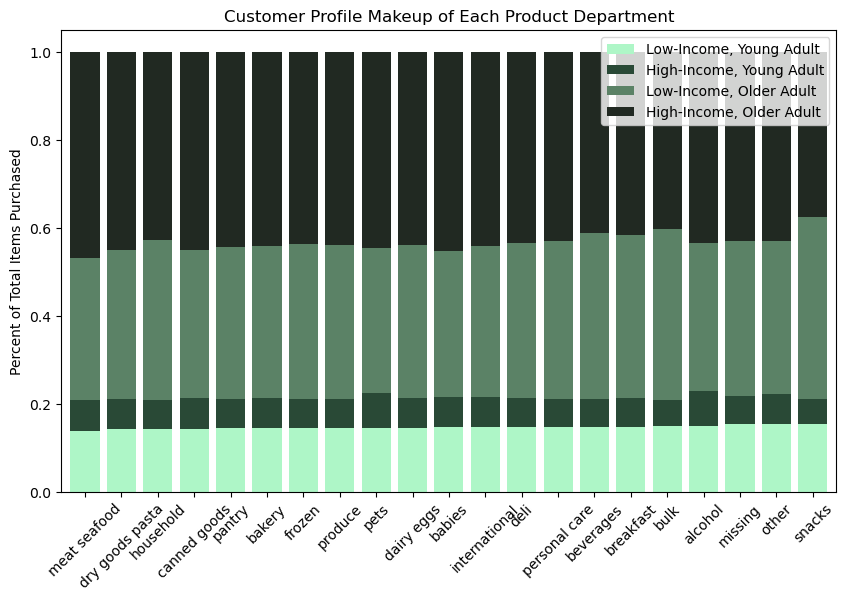

In [87]:
# Plotting the stacked bar chart
profile_departments_stacked_bar = profile_departments.sort_values(['Low-Income, Young Adult', 
                                                                   'Low-Income, Older Adult']).plot(kind='bar', 
                                                                                                    stacked=True, 
                                                           color = ['#aef6c7', '#294936', '#5b8266', '#212922'],
                                                           figsize=(10, 6), width = 0.8)

# Formatting the titles, axes, and legend
plt.title('Customer Profile Makeup of Each Product Department')
plt.xlabel('')
plt.ylabel('Percent of Total Items Purchased')
plt.xticks(rotation = 45)
plt.legend(title = '', loc = 1)

### CONCLUSION
### From a glance, the proportion of each customer profile who purchases items in the different departments is consistent across all departments. Low-Income, Older Adults do seem to spend more on snacks. But for each department, they make up ~55-60% of the total items ordered.

## 23. Clustered Bar Chart - Top 5 Departments x 'customer_profile'

In [88]:
# Create a crosstab to use for stacked bar graph measuring the proportion of customer profiles per department
complete_instacart_data_active.loc[(complete_instacart_data_active['family_status'].isin(['married', 
                                                                                          'divorced/widowed'])) &
                                   (complete_instacart_data_active['income'] <= 97000), 
                                   'customer_profile'] = 'Low-Income, Older Adult'

In [89]:
# Create a list of the five top product departments. These five departments were the same 
# five for all four customer profiles (but in different orders).
top_categories = ['produce', 'dairy eggs', 'beverages', 'snacks', 'frozen']

### Reduce necessary data to run

In [90]:
# Select only the 'order_id', 'department', and 'customer_profile' columns to analyze
top_profile_preferences = complete_instacart_data_active[['order_id', 'department', 'customer_profile']]

# Subset the data to select only the rows from departments in the top five departments
top_profile_preferences = top_profile_preferences.loc[(top_profile_preferences['department'].isin(top_categories))]

### Group data to find total items ordered by department and customer profile

In [91]:
# Aggregate the dataframe by totaling the values in the 'order_id' column for each 'department' and 'customer_profile'
top_profile_preferences = top_profile_preferences.groupby(['department', 'customer_profile']).count().sort_values(by = 'order_id', ascending = False)

# Sort the 'customer_profile' column using the order function
top_profile_preferences = top_profile_preferences.sort_values(by=['customer_profile'],
                                                      key=lambda x: x.map(profile_order_func))

In [92]:
# Check the output
top_profile_preferences

,,order_id
department,customer_profile,
produce,"Low-Income, Young Adult",1324534
frozen,"Low-Income, Young Adult",307701
dairy eggs,"Low-Income, Young Adult",756879
snacks,"Low-Income, Young Adult",429173
beverages,"Low-Income, Young Adult",382625
frozen,"High-Income, Young Adult",140683
beverages,"High-Income, Young Adult",160944
dairy eggs,"High-Income, Young Adult",345102
snacks,"High-Income, Young Adult",156331


### Plot the Clustered Bar Chart

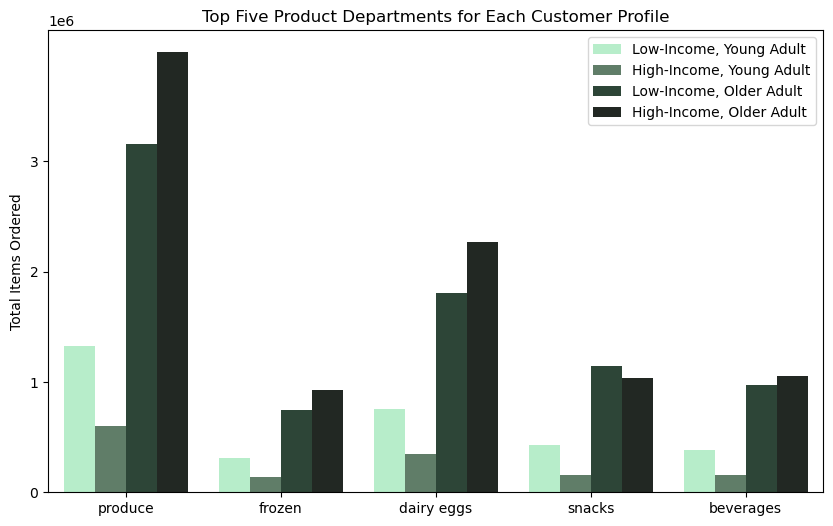

In [93]:
# Plot a clustered bar chart comparing the four customer profiles in the top 5 departments
top_profile_preferences_cluster = plt.figure(figsize = (10,6))
sns.barplot(x = 'department', y = 'order_id', hue = 'customer_profile', 
            data = top_profile_preferences.reset_index(), palette = colors)

# Formatting the titles and axes
plt.title('Top Five Product Departments for Each Customer Profile')
plt.xlabel('')
plt.ylabel('Total Items Ordered')
plt.xticks(rotation = 0)
plt.yticks(np.arange(0, 3500000, step = 1000000))
plt.legend(loc = 1)

### CONCLUSIONS
### Similar to the other visualizations we've seen so far, but we can see Low-Income, Older Adult customers purchasing nearly equal amount of items in the Snacks and Beverages department to High-Income, Older Adult customers.

## 24. Stacked Bar Chart - Top 5 Departments x 'customer_profile'

### Reduce necessary data to run // Group data with a crosstab

In [94]:
# Select only the 'order_id', 'department', and 'customer_profile' columns to analyze
top_profile_preferences_stacked = complete_instacart_data_active[['order_id', 'department', 'customer_profile']]

# Subset the data to select only the rows from departments in the top five departments
top_profile_preferences_stacked = top_profile_preferences_stacked.loc[(top_profile_preferences_stacked['department'].isin(top_categories))]

# Create a crosstab to use for stacked bar graph measuring the proportion of customer profiles per department
top_profile_preferences_stacked = pd.crosstab(top_profile_preferences_stacked['department'],
                                  top_profile_preferences_stacked['customer_profile'], 
                                  dropna = False, normalize='index')

# Sort the 'customer_profile' column headings using the order function
top_profile_preferences_stacked = top_profile_preferences_stacked.sort_values(by=['customer_profile'], axis = 1,
                                                      key=lambda x: x.map(profile_order_func))

### Plot the Stacked Bar Chart

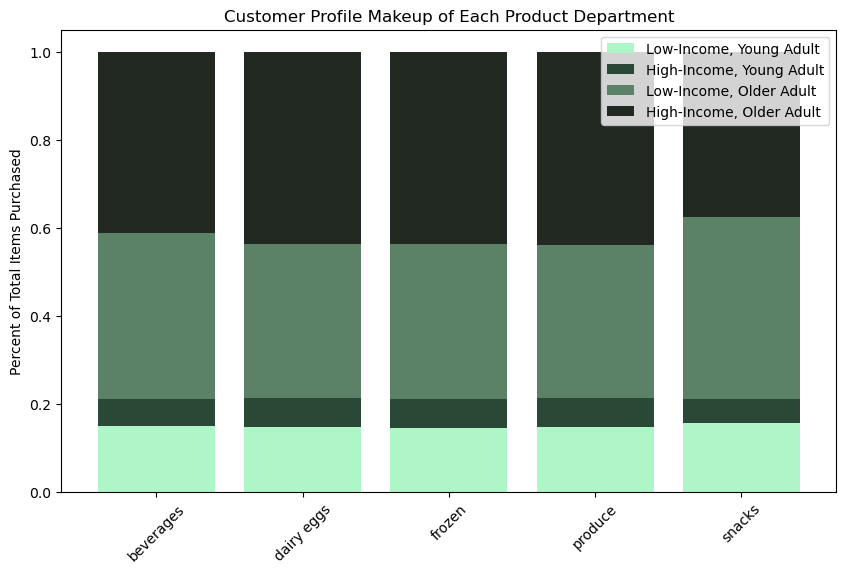

In [95]:
# Plotting the stacked bar chart
top_profile_preferences_stacked_bar = top_profile_preferences_stacked.plot(kind='bar', stacked=True, 
                                                           color = ['#aef6c7', '#294936', '#5b8266', '#212922'],
                                                           figsize=(10, 6), width = 0.8)

# Formatting the titles, axes, and legend
plt.title('Customer Profile Makeup of Each Product Department')
plt.xlabel('')
plt.ylabel('Percent of Total Items Purchased')
plt.xticks(rotation = 45)
plt.legend(title = '', loc = 1)

### CONCLUSION
### A closer look at the visualization from above, with just the top five departments. Low-Income, Older Adults purchase a greater proportion of snacks and beverages than they do in the other categories.

## 25. Boxplot - 'family_status' x 'customer_profile'

### Reduce necessary data to run

In [96]:
# Select only the 'average_price_across_orders' and 'customer_profile' columns to analyze
price_profile = complete_instacart_data_active[['average_price_across_orders', 'customer_profile']]

# Sort the 'customer_profile' column using the order function
price_profile = price_profile.sort_values(by=['customer_profile'], key=lambda x: x.map(profile_order_func))

In [97]:
# Check the output
price_profile

,average_price_across_orders,customer_profile
27549405,8.013423,"Low-Income, Young Adult"
29709236,6.679287,"Low-Income, Young Adult"
29709237,6.679287,"Low-Income, Young Adult"
29709238,6.679287,"Low-Income, Young Adult"
29709239,6.679287,"Low-Income, Young Adult"
...,...,...
15083053,7.127356,"High-Income, Older Adult"
15083052,7.127356,"High-Income, Older Adult"
15083051,7.127356,"High-Income, Older Adult"
15083057,7.127356,"High-Income, Older Adult"


### Plot the Boxplot

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Low-Income, Young Adult'),
  Text(1, 0, 'High-Income, Young Adult'),
  Text(2, 0, 'Low-Income, Older Adult'),
  Text(3, 0, 'High-Income, Older Adult')])

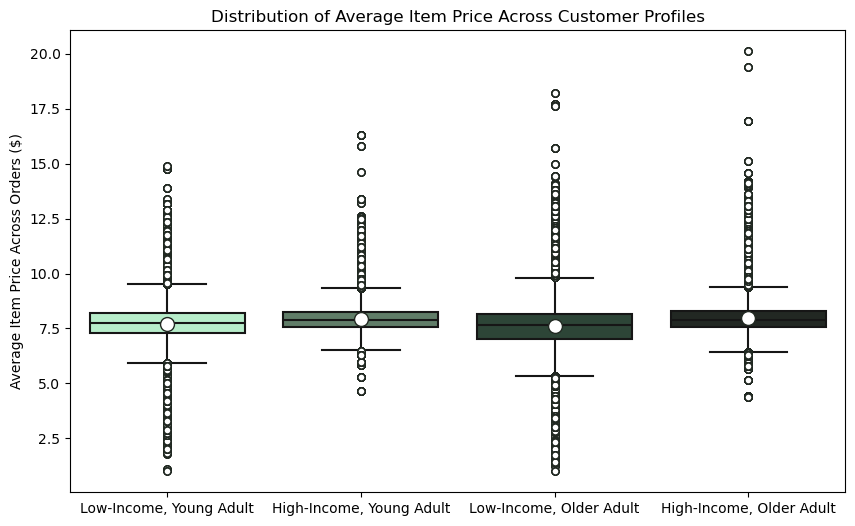

In [98]:
# Plotting the boxplot
price_profile_boxplot = plt.figure(figsize = (10,6))
sns.boxplot(x = 'customer_profile', y = 'average_price_across_orders', data = price_profile, 
            palette = colors, showmeans=True, showfliers = True,
            meanprops={'marker' : 'o',
                       'markerfacecolor' : 'white',
                       'markeredgecolor' : '#212922',
                       'markersize' : '10'},
            flierprops={'marker': 'o', 'markersize': 5, 'markeredgecolor': '#212922', 'markerfacecolor' : 'white'})

# FOR FUTURE: add data points on top of boxes/whiskers, and 


# Formatting the titles and axes
plt.title('Distribution of Average Item Price Across Customer Profiles')
plt.xlabel('')
plt.ylabel('Average Item Price Across Orders ($)')
plt.xticks(rotation = 0)

### CONCLUSION
### Although we could see a slight difference in the raw numbers for this variable, when visualized, those differences do not look as significant. However, we can see that for the Low-Income customers of both age groups, they had the lowest average item prices.

## 26. Bar Chart - Total Items Ordered x 'customer_profile'

### Reduce necessary data ot run // Group the data to measure total items ordered

In [99]:
# Subset the dataframe to only include the 'order_id' and 'customer_profile' columns
orders_profiles = complete_instacart_data_active[['order_id', 'customer_profile']]

# Aggregate the dataframe by counting the number of rows per customer profile
orders_profiles = orders_profiles.groupby('customer_profile').count()

# Sort the 'customer_profile' column using the order function
orders_profiles = orders_profiles.sort_values(by=['customer_profile'], key=lambda x: x.map(profile_order_func))

In [100]:
# Check the output
orders_profiles

,order_id
customer_profile,
"Low-Income, Young Adult",4544888
"High-Income, Young Adult",2030694
"Low-Income, Older Adult",11030656
"High-Income, Older Adult",13358326


### Plot the Bar Chart

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Low-Income, Young Adult'),
  Text(1, 0, 'High-Income, Young Adult'),
  Text(2, 0, 'Low-Income, Older Adult'),
  Text(3, 0, 'High-Income, Older Adult')])

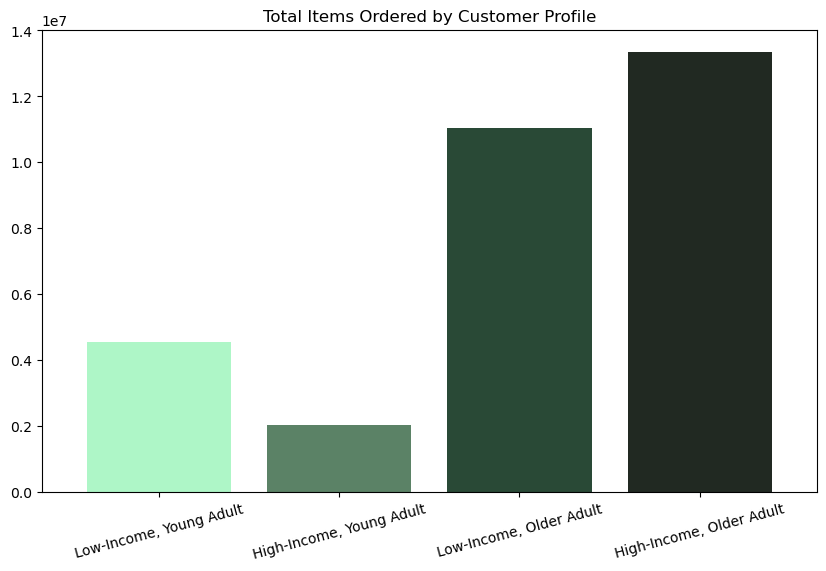

In [101]:
# Plot a bar chart counting the number of users for each customer profile
orders_profiles_bar = plt.figure(figsize = (10,6))
orders_profiles['order_id'].plot.bar(color = colors, figsize=(10, 6), width = 0.8)

# Formatting the titles and axes
plt.title('Total Items Ordered by Customer Profile')
plt.xlabel('')
plt.ylabel('')
plt.xticks(rotation = 15)

### CONCLUSION
### This chart is a companion to the Total Customers by Customer Profile bar chart. Unsurprisingly, the two charts are identical.

## 27. Stacked Bar Chart - 'day' x 'customer_profile'

### Group data with a crosstab comparing the day items are ordered and customer profile

In [102]:
# Create a crosstab to use for clustered bar graph measuring the distribution item purchase days by customer profile
dow_profiles = pd.crosstab(complete_instacart_data_active['day'],
                           complete_instacart_data_active['customer_profile'], dropna = False,
                           normalize = 'index')

# Sort the 'day' column using the order function
dow_profiles = dow_profiles.sort_values(by=['day'], key=lambda x: x.map(dow_order_func))

# Sort the 'customer_profile' column headings using the order function
dow_profiles = dow_profiles.sort_values(by=['customer_profile'], axis = 1, key=lambda x: x.map(profile_order_func))

In [103]:
# Check the output
dow_profiles

customer_profile,"Low-Income, Young Adult","High-Income, Young Adult","Low-Income, Older Adult","High-Income, Older Adult"
day,,,,
Sunday,0.149478,0.065360,0.364040,0.421123
Monday,0.146991,0.064480,0.363037,0.425492
Tuesday,0.146504,0.065006,0.360430,0.428061
Wednesday,0.148460,0.064442,0.359121,0.427977
Thursday,0.147558,0.065942,0.359489,0.427012
Friday,0.143227,0.065877,0.344652,0.446244
Saturday,0.145341,0.067129,0.346268,0.441262


### Plot the Stacked Bar Chart

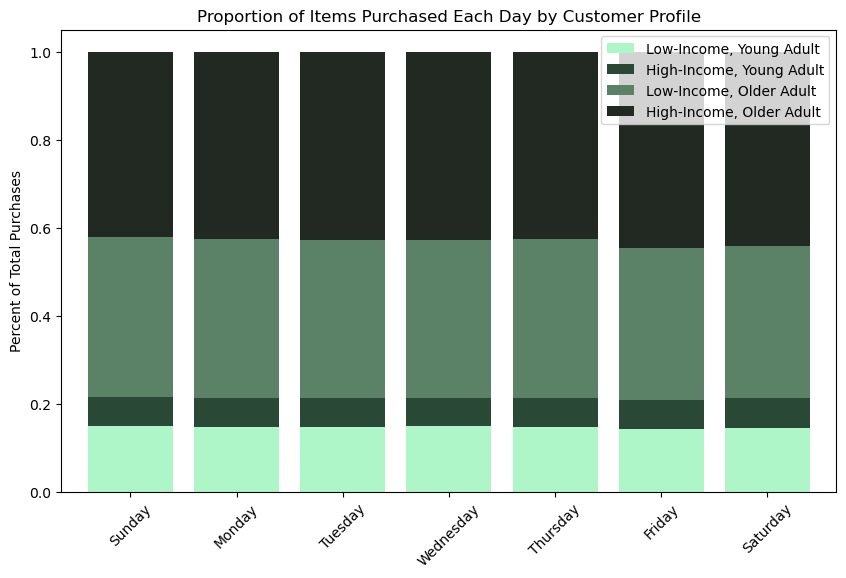

In [104]:
# Plotting the stacked bar chart
dow_profiles_stacked_bar = dow_profiles.plot(kind='bar', stacked=True, 
                                                           color = ['#aef6c7', '#294936', '#5b8266', '#212922'],
                                                           figsize=(10, 6), width = 0.8)

# Formatting the titles, axes, and legend
plt.title('Proportion of Items Purchased Each Day by Customer Profile')
plt.xlabel('')
plt.ylabel('Percent of Total Purchases')
plt.xticks(rotation = 45)
plt.legend(title = '', loc = 1)

### CONCLUSIONS
### There are no differences between customer profiles in days they prefer to shop.

## 28. Stacked Bar Chart - 'order_hour_of_day' x 'customer_profile'

### Group data with a crosstab comparing the time of day items are ordered and customer profile

In [105]:
# Create a crosstab to use for clustered bar graph measuring the time of day each customer profile purchases orders
hod_profiles = pd.crosstab(complete_instacart_data_active['order_hour_of_day'],
                           complete_instacart_data_active['customer_profile'], dropna = False,
                           normalize = 'index')

# Sort the 'customer_profile' column headings using the order function
hod_profiles = hod_profiles.sort_values(by=['customer_profile'], axis = 1, key=lambda x: x.map(profile_order_func))

In [106]:
# Check the output
hod_profiles

customer_profile,"Low-Income, Young Adult","High-Income, Young Adult","Low-Income, Older Adult","High-Income, Older Adult"
order_hour_of_day,,,,
0,0.151287,0.069539,0.356096,0.423078
1,0.153009,0.063236,0.354266,0.429489
2,0.147235,0.066600,0.368117,0.418048
3,0.144684,0.069842,0.369764,0.415710
4,0.153005,0.063728,0.343656,0.439612
5,0.149755,0.061657,0.344322,0.444265
6,0.156587,0.064609,0.343230,0.435574
7,0.150627,0.063684,0.342853,0.442836
8,0.145025,0.065474,0.355425,0.434075


### Plot the Stacked Bar Chart

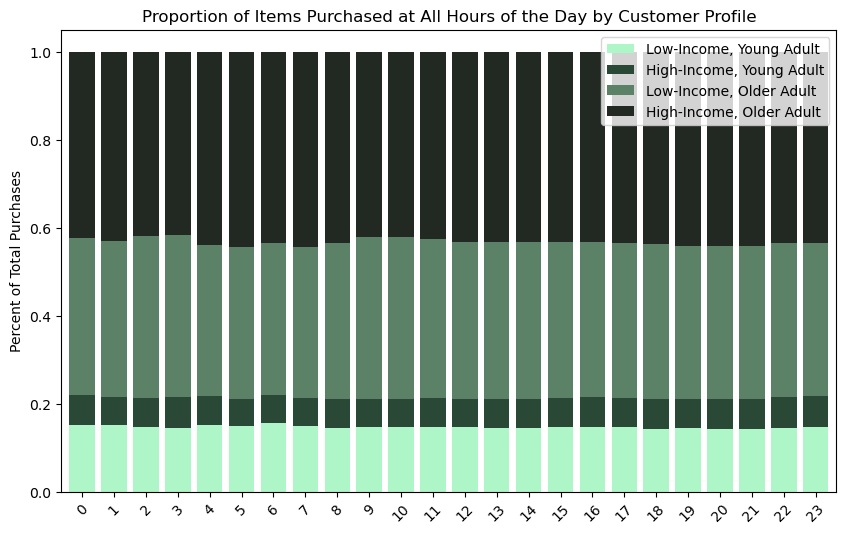

In [107]:
# Plotting the stacked bar chart
hod_profiles_stacked_bar = hod_profiles.plot(kind='bar', stacked=True, 
                                             color = ['#aef6c7', '#294936', '#5b8266', '#212922'],
                                             figsize=(10, 6), width = 0.8)

# Formatting the titles, axes, and legend
plt.title('Proportion of Items Purchased at All Hours of the Day by Customer Profile')
plt.xlabel('')
plt.ylabel('Percent of Total Purchases')
plt.xticks(rotation = 45)
plt.legend(title = '', loc = 1)

### CONCLUSIONS
### There are some slight increases at 4 and 5am for the High-Income, Older Adult profile, but overall there are no differences between customer profiles in the hour of day they prefer to shop.

## 29. Stacked Bar Chart - 'loyalty_flag' x 'customer_profile'

### Group data with a crosstab comparing customer loyalty and customer profile

In [108]:
# Create a crosstab to use for clustered bar graph measuring the customer loyalties of each customer profile
loyalty_profiles = pd.crosstab(complete_instacart_data_active['customer_profile'],
                           complete_instacart_data_active['loyalty_flag'], dropna = False,
                           normalize = 'index')

# Sort the 'loyalty_flag' column headings using the order function
loyalty_profiles = loyalty_profiles.sort_values(by=['loyalty_flag'], axis = 1, key=lambda x: x.map(loyalty_order_func))

# Sort the 'customer_profile' column using the order function
loyalty_profiles = loyalty_profiles.sort_values(by=['customer_profile'], key=lambda x: x.map(profile_order_func))

In [109]:
# Check the output
loyalty_profiles

loyalty_flag,New Customer,Regular Customer,Loyal Customer
customer_profile,,,
"Low-Income, Young Adult",0.157280,0.510110,0.332610
"High-Income, Young Adult",0.149922,0.511675,0.338404
"Low-Income, Older Adult",0.159629,0.510618,0.329752
"High-Income, Older Adult",0.151487,0.515549,0.332964


### Plot the Stacked Bar Chart

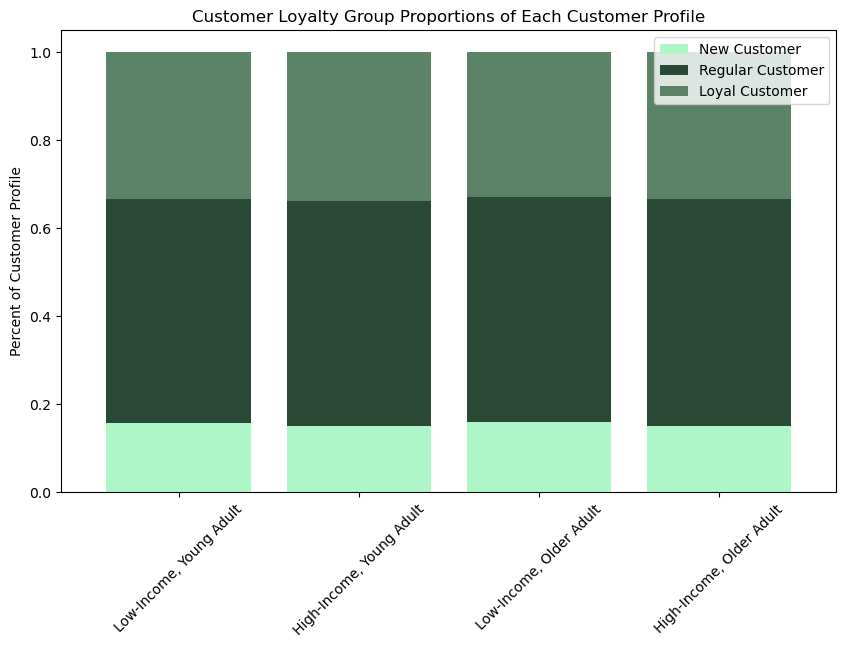

In [110]:
# Plotting the stacked bar chart
loyalty_profiles_stacked_bar = loyalty_profiles.plot(kind='bar', stacked=True, 
                                                     color = ['#aef6c7', '#294936', '#5b8266', '#212922'],
                                                     figsize=(10, 6), width = 0.8)

# Formatting the titles, axes, and legend
plt.title('Customer Loyalty Group Proportions of Each Customer Profile')
plt.xlabel('')
plt.ylabel('Percent of Customer Profile')
plt.xticks(rotation = 45)
plt.legend(title = '', loc = 1)

### CONCLUSIONS
### Each customer profile is made up of the same proportion of customer loyalty groups. Taken together, the only difference in shopping behavior these customer profiles correlate to are minor product department preferences.

## 30. Exporting Visualizations

In [111]:
# Exporting (7) bar chart to the Visualizations folder
region_spenders_stacked_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'stacked_region_spenders.png'))

In [112]:
# Exporting (8) bar chart to the Visualizations folder
region_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_region_total_orders.png'))

In [113]:
# Exporting (9) bar chart to the Visualizations folder
unique_region_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_region_total_customers.png'))

In [114]:
# Exporting (10) boxplot to the Visualizations folder
region_price_boxplot.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'boxplot_itemprice_region.png'))

In [115]:
# Exporting (11) boxplot to the Visualizations folder
order_total_region_boxplot.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'boxplot_ordertotal_region.png'))

In [116]:
# Exporting (12) stacked bar chart to the Visualizations folder
region_department_stacked_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'stacked_region_department.png'))

In [117]:
# Exporting (13) stacked bar chart to the Visualizations folder
region_loyalty_stacked_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'stacked_region_loyalty.png'))

In [118]:
# Exporting (14) stacked bar chart to the Visualizations folder
spending_pricelabel_stacked_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'stacked_spending_pricelabel.png'))

In [119]:
# Exporting (18) bar chart to the Visualizations folder
profile_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_profile_customers.png'))

In [120]:
# Exporting (26) bar chart to the Visualizations folder
orders_profiles_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_profile_orders.png'))

In [121]:
# Exporting (19) clustered bar chart to the Visualizations folder
region_profile_cluster.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'cluster_region_profile.png'))

In [122]:
# Exporting (20) stacked bar chart to the Visualizations folder
region_profile_stacked_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'stacked_region_profile.png'))

In [123]:
# Exporting (22) stacked bar chart to the Visualizations folder
profile_departments_stacked_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'stacked_profile_depart.png'))

In [124]:
# Exporting (23) clustered bar chart to the Visualizations folder
top_profile_preferences_cluster.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'cluster_profile_top_depart.png'))

In [125]:
# Exporting (24) stacked bar chart to the Visualizations folder
top_profile_preferences_stacked_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'stacked_profile_top_depart.png'))

In [126]:
# Exporting (25) boxplot to the Visualizations folder
price_profile_boxplot.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'boxplot_itemprice_profile.png'))

In [127]:
# Exporting (27) stacked bar chart to the Visualizations folder
dow_profiles_stacked_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'stacked_dow_profile.png'))

In [128]:
# Exporting (28) stacked bar chart to the Visualizations folder
hod_profiles_stacked_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'stacked_hod_profile.png'))

In [129]:
# Exporting (29) stacked bar chart to the Visualizations folder
loyalty_profiles_stacked_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'stacked_loyalty_profile.png'))

## 31. Exporting Data

In [130]:
# Export complete_instacart_data_active to the Prepared Data folder
complete_instacart_data_active.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'profiled_instacart_data.pkl'))

In [156]:
price_by_department = complete_instacart_data_active[['department', 'prices']]
price_by_department = price_by_department.groupby('department').mean('prices')

In [157]:
price_by_department

,prices
department,
alcohol,8.150699
babies,7.634399
bakery,7.857482
beverages,7.682556
breakfast,8.031647
bulk,8.346919
canned goods,7.546660
dairy eggs,8.336372
deli,7.783347


Text(0, 0.5, '')

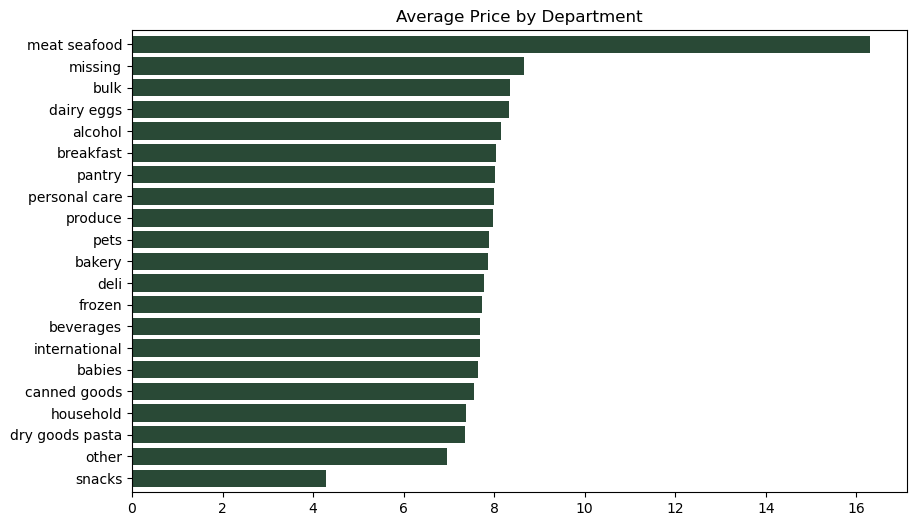

In [162]:
# Plot a bar chart counting the number of users for each customer profile
price_by_department_bar = plt.figure(figsize = (10,6))
price_by_department['prices'].sort_values().plot.barh(color = '#294936', figsize=(10, 6), width = 0.8)

# Formatting the titles and axes
plt.title('Average Price by Department')
plt.xlabel('')
plt.ylabel('')